<a href="https://colab.research.google.com/github/Falconwatch/MarketKing/blob/main/Support_resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом ноутбуке развивается предсказатель высшей точки. Его цель - предсказывать, что мы находимя в локлаьном максимуме - цены выше на заданном горизонте в будущем не будет

In [3]:
#!pip install yfinance

In [1]:
from numpy.core.numeric import isclose
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import isclose
%matplotlib inline

In [2]:
from methods import *

# Готовим данные

In [3]:
stocks = load_data("MSFT", period_start="2021-01-01", step="1d")
print(stocks.shape[0])
stocks.head()

[*********************100%***********************]  1 of 1 completed
298


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,220.224826,220.689959,212.584796,215.434967,37130100
2021-01-05,215.009422,216.256380,213.465584,215.642792,23823000
2021-01-06,209.972127,214.247383,209.744514,210.051300,35930700
2021-01-07,211.822773,217.067874,211.496205,216.028748,27694500
2021-01-08,216.414706,218.295033,214.781804,217.344971,22956200


## Размечаем таргет

Размечаем таргет...


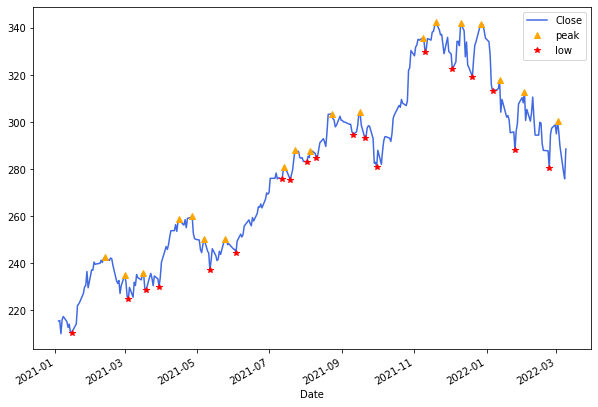

In [4]:
print("Размечаем таргет...")
mark_data_targets(stocks, window=10)

# отрисовываем график таргеты
stocks["Close"].plot(figsize=[10,7], color="royalblue")
stocks.loc[stocks["peaks"]==1, "Close"].plot(style="^", label="peak", color="orange")
stocks.loc[stocks["lows"]==1, "Close"].plot(style="*", label="low", color="red")

_ = plt.legend()

# Уровни поддержики и сопротивления

# Валидация стратегии

In [17]:
money_hist_train, money_train, eq_train = validate(train_data, start_money = 10000, verbose=2)

Денег в начале стратегии: 10000
2021-01-12 00:00:00: Покупаем 47.0  по цене 212.70355224609375, остаток средств: 2.93304443359375
2021-02-12 00:00:00: Покупаем 0.0  по цене 242.45216369628906, остаток средств: 2.93304443359375
2021-02-18 00:00:00: Покупаем 0.0  по цене 241.8202667236328, остаток средств: 2.93304443359375
2021-02-19 00:00:00: Покупаем 0.0  по цене 239.0230712890625, остаток средств: 2.93304443359375
2021-03-02 00:00:00: Покупаем 0.0  по цене 231.9804229736328, остаток средств: 2.93304443359375
2021-03-03 00:00:00: Покупаем 0.0  по цене 225.7213897705078, остаток средств: 2.93304443359375
2021-03-15 00:00:00: Продаём 47.0  по цене 232.91282653808594, остаток средств: 10949.835891723633
2021-03-17 00:00:00: Покупаем 46.0  по цене 235.12481689453125, остаток средств: 134.0943145751953
2021-03-18 00:00:00: Покупаем 0.0  по цене 228.8558807373047, остаток средств: 134.0943145751953
2021-03-24 00:00:00: Покупаем 0.0  по цене 233.5575714111328, остаток средств: 134.09431457519

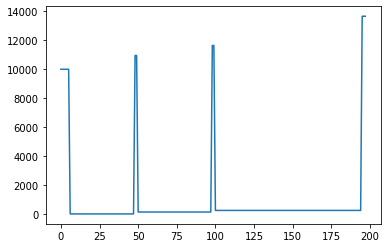

In [18]:
plt.plot(money_hist_train)

In [19]:
money_hist_test, money_test, eq_test = validate(test_data, start_money = 10000, verbose=2)

Денег в начале стратегии: 10000
2021-10-22 00:00:00: Покупаем 32.0  по цене 307.9586486816406, остаток средств: 145.3232421875
2021-11-09 00:00:00: Покупаем 0.0  по цене 334.6445617675781, остаток средств: 145.3232421875
2021-11-10 00:00:00: Покупаем 0.0  по цене 329.5145568847656, остаток средств: 145.3232421875
2021-11-22 00:00:00: Покупаем 0.0  по цене 339.1287536621094, остаток средств: 145.3232421875
2021-11-23 00:00:00: Покупаем 0.0  по цене 336.98321533203125, остаток средств: 145.3232421875
2021-12-13 00:00:00: Покупаем 0.0  по цене 338.69964599609375, остаток средств: 145.3232421875
2021-12-13 00:00:00: Продаём 32.0  по цене 338.69964599609375, остаток средств: 10983.7119140625
2021-12-14 00:00:00: Покупаем 33.0  по цене 327.6624755859375, остаток средств: 170.8502197265625
2021-12-14 00:00:00: Продаём 33.0  по цене 327.6624755859375, остаток средств: 10983.7119140625
2021-12-30 00:00:00: Покупаем 32.0  по цене 338.6198425292969, остаток средств: 147.876953125
2021-12-31 00:00

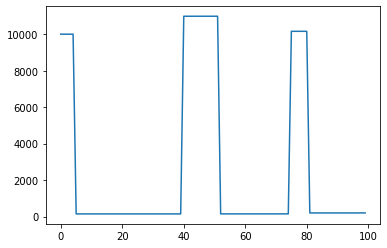

In [20]:
plt.plot(money_hist_test)